<a href="https://colab.research.google.com/github/ChinmoyKumerRoy/ChinmoyKumerRoy/blob/main/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
data = pd.read_csv('sample_data/mnist_train_small.csv').iloc[:,:].values
y = data[:,0]
x = data[:,1:]

In [ ]:
temp = []
for i in x:
  temp.append(i.reshape(28,28))
temp = np.array(temp)
temp.shape

(19999, 28, 28)

In [ ]:
from keras.utils import to_categorical
x = temp.reshape(-1,28,28,1)
y = to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [ ]:
#history = model.fit(x, y, validation_split=0.1, epochs=12, batch_size=128)

Train on 17999 samples, validate on 2000 samples
Epoch 1/12
17999/17999 [==============================] - 3s 155us/step - loss: 2.4274 - accuracy: 0.6706 - val_loss: 0.1711 - val_accuracy: 0.9525
Epoch 2/12
17999/17999 [==============================] - 2s 138us/step - loss: 0.2928 - accuracy: 0.9114 - val_loss: 0.1253 - val_accuracy: 0.9655
Epoch 3/12
17999/17999 [==============================] - 2s 137us/step - loss: 0.2041 - accuracy: 0.9379 - val_loss: 0.1081 - val_accuracy: 0.9745
Epoch 4/12
17999/17999 [==============================] - 3s 139us/step - loss: 0.1606 - accuracy: 0.9524 - val_loss: 0.0941 - val_accuracy: 0.9755
Epoch 5/12
17999/17999 [==============================] - 2s 138us/step - loss: 0.1308 - accuracy: 0.9594 - val_loss: 0.0844 - val_accuracy: 0.9790
Epoch 6/12
17999/17999 [==============================] - 2s 137us/step - loss: 0.1207 - accuracy: 0.9623 - val_loss: 0.0879 - val_accuracy: 0.9815
Epoch 7/12
17999/17999 [==============================] - 2s 13

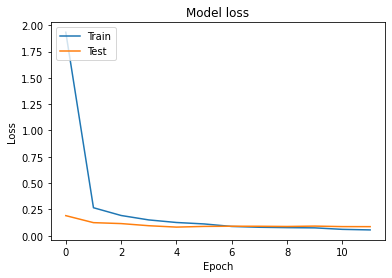

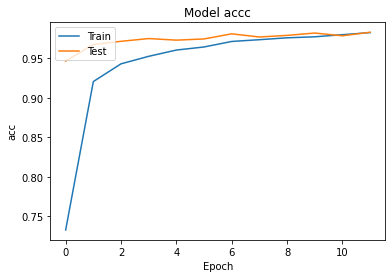

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import cv2

all_img = []
for i in range(0,10):
  img1 = cv2.imread(str(i)+'.jpg',0)
  (thresh, im_bw) = cv2.threshold(img1, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  inv = cv2.bitwise_not(im_bw)
  all_img.append(cv2.resize(inv, (28,28)))

In [ ]:
all_img = np.array(all_img)

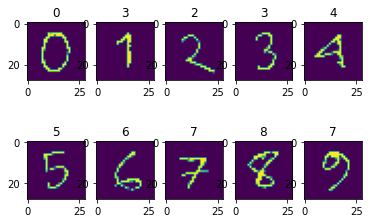

In [ ]:
for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(all_img[i-1])
  plt.title(np.argmax(model.predict(np.reshape(all_img[i-1],(-1,28,28,1)))))


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False, zoom_range=0.1)

datagen.fit(X_train)


In [ ]:
# model.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=100, epochs=1)
model.fit(datagen.flow(X_train, y_train,batch_size=100),validation_data=(X_test, y_test),epochs=5)

Epoch 1/5
160/160 [==============================] - 7s 47ms/step - loss: 0.4931 - accuracy: 0.8439 - val_loss: 38.7524 - val_accuracy: 0.6045
Epoch 2/5
160/160 [==============================] - 7s 45ms/step - loss: 0.4495 - accuracy: 0.8574 - val_loss: 36.0246 - val_accuracy: 0.5903
Epoch 3/5
160/160 [==============================] - 7s 45ms/step - loss: 0.4119 - accuracy: 0.8737 - val_loss: 67.6679 - val_accuracy: 0.4590
Epoch 4/5
160/160 [==============================] - 7s 45ms/step - loss: 0.3873 - accuracy: 0.8822 - val_loss: 48.1031 - val_accuracy: 0.5725
Epoch 5/5
160/160 [==============================] - 7s 45ms/step - loss: 0.3465 - accuracy: 0.8927 - val_loss: 83.6801 - val_accuracy: 0.4450
